In [1]:
import konlpy.tag
import re

In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
def get_article(url):
    # Obtain three types of information about a news article
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'lxml')
    news_title = soup.title.text
    publisher = soup.find('meta', attrs={'name':'twitter:creator'}).get('content')
    news_content = soup.find('div', attrs = {'id':'articleBodyContents'}).text
    news_content = news_content.split('{}')[1].strip()
    return news_title, publisher, news_content

In [4]:
url = 'https://news.naver.com/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=001&aid=0010387791&date=20181009&type=1&rankingSeq=1&rankingSectionId=102'
title, publisher, content = get_article(url)

In [6]:
content

'행정용어 외래어 빈번, 한글+외국어 무분별 혼용지역 소개도 마찬가지, "공무원 교육·언어 순화 힘써야"\'이 세상에 한글을 반포하노라\'(서울=연합뉴스) 김도훈 기자 = 한글날을 하루 앞둔 8일 오전 서울 광화문 광장 세종대왕상 위로 푸른 가을 하늘이 펼쳐져 있다.    527돌 한글날 경축식은 9일 오전 10시 한글날이 국경일로 격상된 2006년 이후 12년 만에 처음으로 광화문광장 세종대왕 동상 앞에서 1천200여명이 참석한 가운데 실외행사로 열린다. 2018.10.8    superdoo82@yna.co.kr(끝)    (전국종합=연합뉴스) "공무원들은 평소에 정말 이런 용어를 쓰고 있나요? 솔직히 무슨 말인지 하나도 모르겠어요"    훈민정음(訓民正音) 창제와 반포를 기념하는 한글날이 572돌을 맞았지만, 지자체는 여전히 외래어가 뒤섞인 알쏭달쏭한 행정용어를 사용하는 것으로 나타났다.    한글 대체가 가능한 행정용어를 외래어로 쓰거나, 한글과 외국어를 혼용해 신조어를 만드는 등 지자체의 한글 파괴가 도를 넘었다는 지적이 나온다.    전 세계가 인정하는 가장 과학적인 문자를 갖고도 굳이 의미가 불분명한 외래어를 행정용어로 고집하는 지자체의 관행에 개선이 요구된다.창제 570돌 맞은 한글…한글날 기념행사 풍성[연합뉴스 자료사진]    ◇ 지역 소개에 꼭 외국어를 사용해야 하나요?    \'블루시티(Blue-city) 거제\', \'로맨틱(Romantic) 춘천\', \'원더풀(wonderful) 삼척\', \'레인보우(Rainbow) 영동\', \'드림허브(Dream hub) 군산\'.    전국 지자체가 시·군 누리집(홈페이지) 등에 지역을 소개할 때 넣은 문구를 간추렸다. 열거한 지자체는 외국어 사례 중 극히 일부다.'

In [15]:
# http://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010083362&date=20180514&type=1&rankingSectionId=100&rankingSeq=4
with open('Talk_2018.10.26 11_17-3.txt', 'r', encoding='utf8') as f:
    content = f.read()

In [16]:
# Text cleaning
filtered_content = content.replace('.', '').replace(',','').replace("'","").replace('·', ' ').replace('=','')

In [17]:
# Twitter has changed to Okt since 0.4.5
twitter = konlpy.tag.Twitter()
twitter_morphs = twitter.pos(filtered_content)
print(twitter_morphs)

C:\Users\ahn92\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
komoran = konlpy.tag.Komoran()
komoran_morphs = komoran.pos(filtered_content)
print(komoran_morphs)

[('행정', 'NNP'), ('용어', 'NNP'), ('외래어', 'NNP'), ('빈번', 'XR'), ('한글', 'NNP'), ('+', 'SW'), ('외국어', 'NNP'), ('무', 'XPN'), ('분별', 'NNG'), ('혼', 'NNG'), ('용지역', 'NNP'), ('소개', 'NNG'), ('도', 'JX'), ('마찬가지', 'NNG'), ('"', 'SS'), ('공무원', 'NNP'), ('교육', 'NNG'), ('언어 순화', 'NNP'), ('힘쓰', 'VV'), ('어야', 'EC'), ('"', 'SS'), ('이', 'MM'), ('세상', 'NNG'), ('에', 'JKB'), ('한글', 'NNG'), ('을', 'JKO'), ('반포', 'NNG'), ('하', 'XSV'), ('노라', 'EC'), ('(', 'SS'), ('서울', 'NNP'), ('연합뉴스', 'NNP'), (')', 'SS'), ('김도훈', 'NNP'), ('기자', 'NNG'), ('한글날', 'NNP'), ('을', 'JKO'), ('하루', 'NNG'), ('앞두', 'VV'), ('ㄴ', 'ETM'), ('8', 'SN'), ('일', 'NNB'), ('오전', 'NNP'), ('서울', 'NNP'), ('광화문', 'NNP'), ('광장', 'NNP'), ('세종대왕', 'NNP'), ('상', 'XSN'), ('위', 'NNG'), ('로', 'JKB'), ('푸른', 'NNP'), ('가', 'VV'), ('을', 'ETM'), ('하늘', 'NNG'), ('이', 'JKS'), ('펼쳐지', 'VV'), ('어', 'EC'), ('있', 'VV'), ('다', 'EC'), ('527', 'SN'), ('돌', 'NNP'), ('한글날', 'NNP'), ('경축', 'NNG'), ('식', 'NNB'), ('은', 'JX'), ('9', 'SN'), ('일', 'NNB'), ('오전', 'NNP'), ('10', 'SN'

In [18]:
Noun_words = []
for word, pos in twitter_morphs:
    if pos == 'Noun':
        Noun_words.append(word)
#print(Noun_words)


In [31]:
len('안')

1

In [44]:
# 불용어 제거를 위한 별도의 사전 (list 변수) 구축
stopwords = ['안주영', '김석호', '박가람','이종문','박상원','김민우','오전','오후','사진','안주','이종','주영','서코','사람']
unique_Noun_words = set(Noun_words)
for word in unique_Noun_words:
    if word in stopwords:
        while word in Noun_words: Noun_words.remove(word)
    if len(word) == 1:
        while word in Noun_words: Noun_words.remove(word)

In [12]:
print(Noun_words)

['행정', '용어', '외래어', '빈번', '한글', '외국어', '무분별', '혼용', '지역', '소개', '마찬가지', '공무원', '교육', '언어', '순화', '이', '세상', '한글', '반포', '김도훈', '한글날', '하루', '오전', '광화문', '광장', '세종대왕', '위로', '푸른', '가을', '하늘', '돌', '한글날', '경축', '오전', '한글날', '국경일', '격상', '이후', '처음', '광화문', '광장', '세종대왕', '동상', '앞', '여명', '참석', '가운데', '실외', '행사', '린다', '끝', '전국', '종합', '공무원', '평소', '정말', '용어', '무슨', '말', '하나', '훈민정음', '창제', '반포', '기념', '한글날', '돌', '지자체', '외래어', '뒤', '행정', '용어', '사용', '것', '한글', '대체', '행정', '용어', '외래어', '한글', '외국어', '혼용', '신조어', '등', '지자체', '한글', '파괴', '지적', '전', '세계', '인정', '가장', '과학', '문자', '굳이', '의미', '불분명', '외래어', '행정', '용어', '고집', '지자체', '관행', '개선', '요구', '창제', '돌', '한글', '한글날', '기념', '행사', '성', '자료', '사진', '지역', '소개', '꼭', '외국어', '사용', '하나요', '블루', '시티', '거제', '로맨틱', '춘천', '원더풀', '삼척', '레인보우', '영동', '드림', '허브', '군산', '전국', '지자체', '시', '군', '누리집', '홈페이지', '등', '지역', '소개', '때', '문구', '간추렸다', '열거', '지자체', '외국어', '사례', '중', '극히', '일부']


In [45]:
from collections import Counter
c = Counter(Noun_words)

In [34]:
print(c.most_common(20))

[('사람', 160), ('존나', 122), ('면접', 107), ('그거', 101), ('보험', 90), ('학교', 87), ('오늘', 86), ('그냥', 80), ('시발', 75), ('생각', 71), ('지금', 70), ('경험', 70), ('리스크', 69), ('수업', 66), ('하나', 66), ('서코', 64), ('어디', 61), ('공부', 61), ('분석', 61), ('계리', 59)]


In [23]:
# customized_konlpy (ckonlpy)를 사용해서 새로운 단어 추가하기
from ckonlpy.tag import Twitter
twitter = Twitter()

C:\Users\Sang\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [46]:
tags = c.most_common(80)

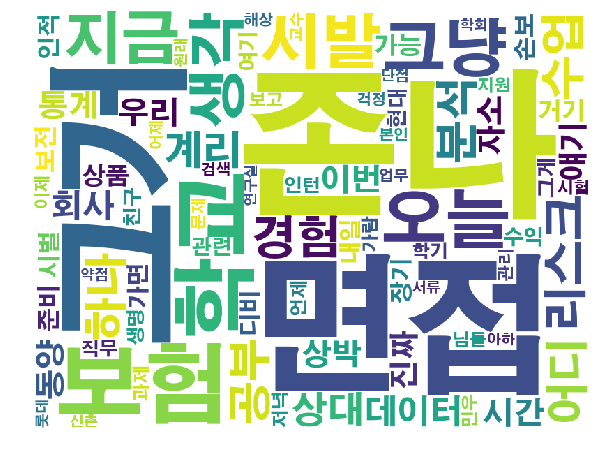

In [47]:
font_path = 'C:\Windows\Fonts\H2GTRE.TTF'
wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)

In [24]:
text = '파이콘은 파이썬 콘퍼런스의 약자이다'
print(twitter.pos(text))

[('파', 'Noun'), ('이콘', 'Noun'), ('은', 'Josa'), ('파이썬', 'Noun'), ('콘퍼런스', 'Noun'), ('의', 'Josa'), ('약자', 'Noun'), ('이다', 'Josa')]


In [25]:
twitter.add_dictionary('파이콘', 'Noun') # Add a new word to the dictionary temporarily 
print(twitter.pos(text))

[('파이콘', 'Noun'), ('은', 'Josa'), ('파이썬', 'Noun'), ('콘퍼런스', 'Noun'), ('의', 'Josa'), ('약자', 'Noun'), ('이다', 'Josa')]


In [26]:
from collections import Counter
c = Counter(Noun_words) # input type should be a list of words (or tokens)
print(c)
k = 20
print(c.most_common(k)) # 빈도수 기준 상위 k개 단어 출력

Counter({'북한': 27, '것': 19, '미국': 13, '비핵화': 12, '이행': 9, '북미': 9, '트럼프': 8, '폼페이': 7, '오': 7, '제거': 7, '핵': 7, '수': 6, '볼턴': 5, '대북': 5, '제재': 5, '해제': 5, '등': 5, '관': 5, '핵무기': 5, '방안': 5, '무기': 5, '단계': 4, '대통령': 4, '행정부': 4, '보좌': 4, '장관': 4, '검증': 4, '를': 4, '우라늄': 4, '농축': 4, '고': 4, '함': 4, '및': 4, '합의': 4, '방식': 4, '요구': 3, '다음': 3, '빅딜': 3, '외교': 3, '안보': 3, '이': 3, '첫': 3, '제공': 3, '우선': 3, '폐기': 3, '반출': 3, '시설': 3, '보유': 3, '거론': 3, '살상': 3, '정상회담': 3, '핵물질': 3, '예상': 3, '우리': 3, '지원': 3, '조치': 2, '기간': 2, '압축': 2, '밑그림': 2, '소개': 2, '구체': 2, '김정은': 2, '국무위원': 2, '사진': 2, '달': 2, '싱가포르': 2, '간': 2, '회담': 2, '가운데': 2, '핵심': 2, '통해': 2, '대해': 2, '임기': 2, '마지막': 2, '국제사회': 2, '투자': 2, '각종': 2, '수교': 2, '평화협정': 2, '체결': 2, '내용': 2, '마이크': 2, '국무장관': 2, '시한': 2, '불가': 2, '역적': 2, '플루토늄': 2, '능력': 2, '주도': 2, '대량': 2, '모두': 2, '정책': 2, '인터뷰': 2, '의지': 2, '핵탄두': 2, '일부': 2, '면': 2, '말': 2, '그': 2, '정부': 2, '차원': 2, '해석': 2, '과': 2, '내': 2, '대한': 2, '동의': 2, '센터': 2, '문의': 2, '거래':

In [ ]:
kpnlpy.